- 출처: https://github.com/facebookresearch/esm

In [5]:
import esm
import matplotlib.pyplot as plt
import torch

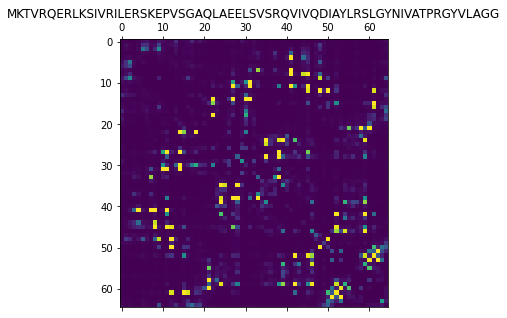

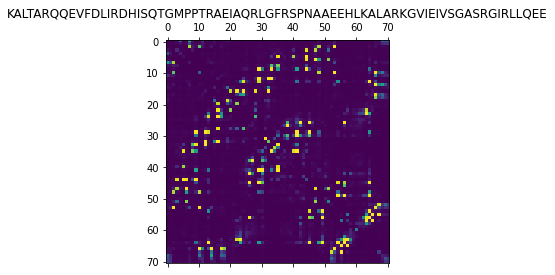

In [6]:
model, alphabet = esm.pretrained.esm1b_t33_650M_UR50S()
batch_converter = alphabet.get_batch_converter()
data = [(0, 'MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG'), 
        (1,'KALTARQQEVFDLIRDHISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE')]
batch_labels, batch_strs, batch_tokens = batch_converter(data)
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[33], return_contacts=True)
for (_, seq), attention_contacts in zip(data, results["contacts"]):
    plt.matshow(attention_contacts[: len(seq), : len(seq)])
    plt.title(seq)